##Preparation and Loading data

In [24]:
from google.colab import drive
import imageio
from PIL import Image
from os import walk
import numpy as np
from statistics import mode
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import KFold

In [4]:
drive.mount('/content/drive')
mypath = '/content/drive/MyDrive/HW5_ML/Q6_Dataset/Images/'
image_names = next(walk(mypath), (None, None, []))[2]
data = [np.array(Image.open(mypath+name)) for name in image_names]

Mounted at /content/drive


##A

###Using mean of Red and Blue dimensions as features

In [5]:
X = np.zeros((len(data), 2))
for i in range(len(data)):
  X[i,0] = np.mean(data[i][:,:,0])
  X[i,1] = np.mean(data[i][:,:,2])

In [ ]:
gm = GaussianMixture(n_components=2, random_state=0).fit(X)

In [ ]:
pred = gm.predict(X)

In [ ]:
score = silhouette_score(X, pred, metric='euclidean')
round(score, 3)

0.371

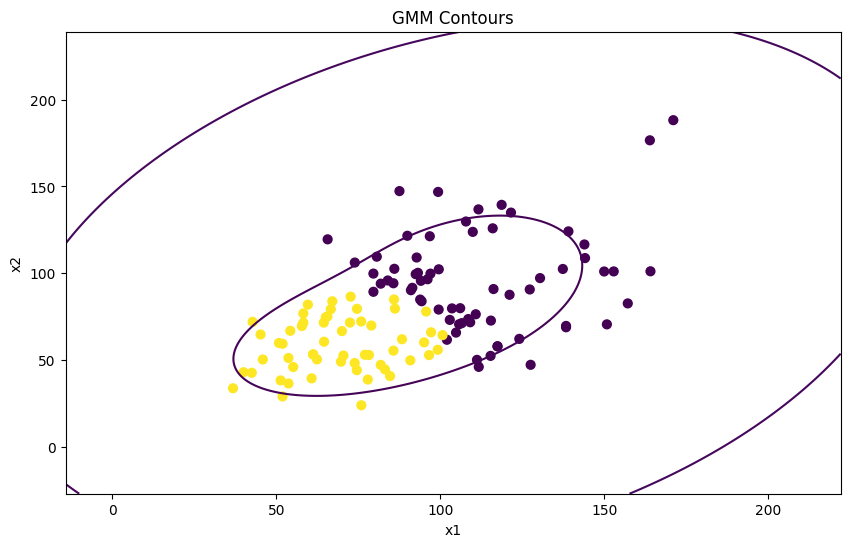

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min-50, x_max+50, 1000), np.linspace(y_min-50, y_max+50, 1000))
Z = -gm.score_samples(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contour(xx, yy, Z, levels=np.logspace(0, 3, 10), cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis', c=pred)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('GMM Contours')
plt.show()

In [ ]:
gm.means_

array([[106.81314379,  91.7794563 ],
       [ 73.22719697,  62.12078031]])

In [ ]:
gm.weights_

array([0.55833772, 0.44166228])

###Using Mean and Mode of Red dimension as features

In [6]:
#Works better
X = np.zeros((len(data), 2))
for i in range(len(data)):
  X[i,0] = np.mean(data[i][:,:,0])
  X[i,1] = mode(np.ravel(data[i][:,:,0]))

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0).fit(X)

In [ ]:
pred = gm.predict(X)

In [ ]:
score = silhouette_score(X, pred, metric='euclidean')
round(score, 3)

0.696

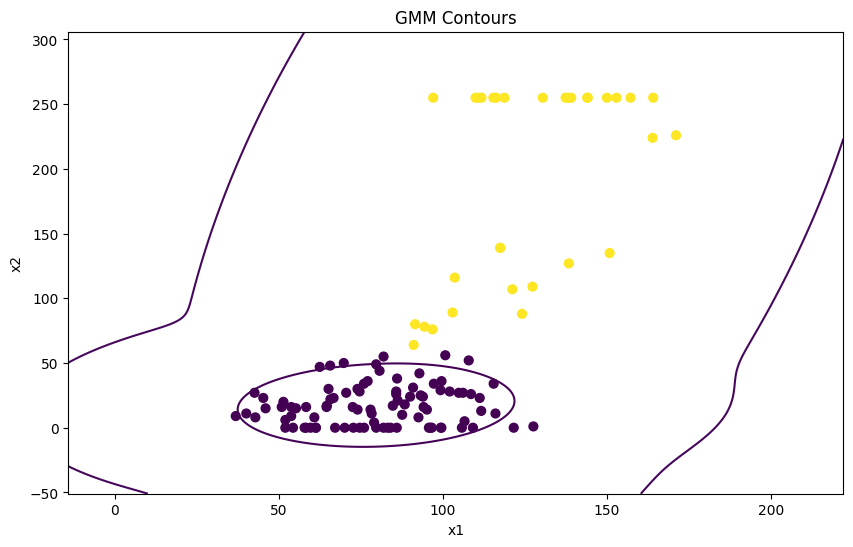

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min-50, x_max+50, 1000), np.linspace(y_min-50, y_max+50, 1000))
Z = -gm.score_samples(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contour(xx, yy, Z, levels=np.logspace(0, 3, 10), cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis', c=pred)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('GMM Contours')
plt.show()

In [ ]:
gm.means_

array([[ 79.38927623,  17.16193388],
       [125.31515048, 184.48694753]])

In [ ]:
gm.weights_

array([0.72585777, 0.27414223])

##B

In [26]:
kf = KFold(n_splits=20)
num_comp = 2
scores = list()
for i, (train_index, test_index) in enumerate(kf.split(X)):
  pred = GaussianMixture(n_components=2, random_state=0).fit(X[train_index]).predict(X[train_index])
  scores.append(silhouette_score(X[train_index], pred, metric='euclidean'))
  num_comp += 1

Text(0.5, 0, '#Components')

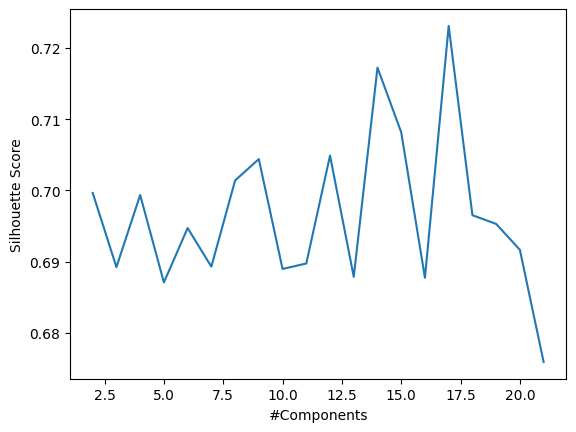

In [29]:
plt.plot(list(range(2,22)), scores)
plt.ylabel('Silhouette Score')
plt.xlabel('#Components')